## Item similarity based recommender systems

In [2]:
import numpy as np
import pandas as pd

In [3]:
columns_names = ['user_id','item_id','rating','timestamp']

In [6]:
df = pd.read_csv('files/19-Recommender-Systems/u.data',sep='\t',names = columns_names)

In [7]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [8]:
movie_titles = pd.read_csv("files/19-Recommender-Systems/Movie_Id_Titles") 

In [9]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df,movie_titles,on="item_id")

In [11]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [14]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [15]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [17]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [18]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
ratings['Number of Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [20]:
ratings.head()

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


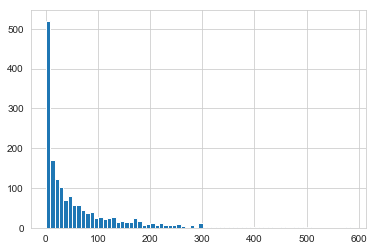

In [21]:
ratings['Number of Ratings'].hist(bins=70)

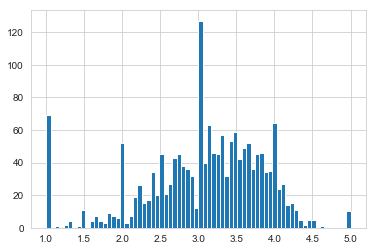

In [22]:
ratings['rating'].hist(bins=70)

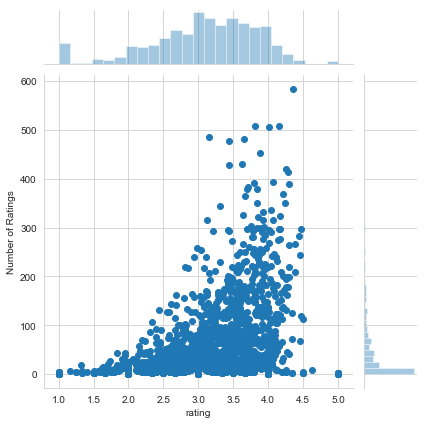

In [23]:
sns.jointplot(x="rating",y="Number of Ratings",data=ratings)

## Now We Recommend

In [25]:
movie_mat = df.pivot_table(index="user_id",columns="title",values="rating")

In [26]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings.sort_values('Number of Ratings',ascending=False)

,rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [28]:
star_wars_users_ratings = movie_mat['Star Wars (1977)']
liar_liar_user_ratings=movie_mat['Liar Liar (1997)']

In [29]:
star_wars_users_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
6      4.0
7      5.0
8      5.0
9      5.0
10     5.0
11     NaN
12     4.0
13     5.0
14     5.0
15     5.0
16     NaN
17     NaN
18     4.0
19     NaN
20     3.0
21     3.0
22     5.0
23     4.0
24     NaN
25     5.0
26     4.0
27     3.0
28     4.0
29     NaN
      ... 
914    NaN
915    NaN
916    5.0
917    3.0
918    NaN
919    3.0
920    NaN
921    4.0
922    5.0
923    5.0
924    5.0
925    NaN
926    NaN
927    NaN
928    NaN
929    4.0
930    2.0
931    3.0
932    NaN
933    4.0
934    5.0
935    NaN
936    4.0
937    5.0
938    5.0
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [31]:
similar_star_wars = movie_mat.corrwith(star_wars_users_ratings)

In [32]:
similar_liar_liar = movie_mat.corrwith(liar_liar_user_ratings)

C:\Users\Dheeru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Dheeru\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
corr_starwars = pd.DataFrame(similar_star_wars,columns=['Correlations'])
corr_starwars.dropna(inplace=True)

In [34]:
corr_starwars

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [35]:
corr_starwars = corr_starwars.join(ratings['Number of Ratings'])

In [36]:
corr_starwars.head()

,Correlations,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [38]:
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values('Correlations',ascending=False).head()

,Correlations,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [41]:
corr_liar_liar = pd.DataFrame(similar_liar_liar,columns=['Correlations'])

In [42]:
corr_liar_liar.head()

,Correlations
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [46]:
corr_liar_liar.dropna(inplace=True)

In [44]:
corr_liar_liar=corr_liar_liar.join(ratings['Number of Ratings'])

In [45]:
corr_liar_liar[corr_liar_liar['Number of Ratings']>100].sort_values('Correlations',ascending=False).head()

,Correlations,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
